# Introduction

Code trên định nghĩa một mạng neural network với các lớp khác nhau như Layer, FCLayer (Fully Connected Layer), ActivationLayer, và Network. Dưới đây là giải thích từng phần:

1. **CLASS LAYER**: Đây là lớp cơ bản, chứa các phương thức trừu tượng để được định nghĩa lại bởi các lớp con của nó. Các phương thức trừu tượng bao gồm `forward_propagation` và `backward_propagation`, được sử dụng để thực hiện quá trình lan truyền tiến và lan truyền ngược trong mạng neural network.

2. **FULL CONNECTED LAYER (FCLayer)**: Đây là một lớp lớp đặc trưng, thực hiện các phép tính liên quan đến Fully Connected Layer, bao gồm cả quá trình lan truyền tiến và lan truyền ngược. Trong quá trình khởi tạo, ma trận trọng số và bias được khởi tạo một cách ngẫu nhiên. Các phương thức `forward_propagation` và `backward_propagation` được cài đặt để thực hiện tính toán trên dữ liệu đầu vào và lỗi.

3. **CLASS ACTIVATION LAYER**: Lớp này thực hiện các phép tính kích hoạt, như ReLU, Sigmoid, Tanh, vv. Các phương thức `forward_propagation` và `backward_propagation` ở đây tính toán giá trị đầu ra và đạo hàm của hàm kích hoạt tương ứng.

4. **CLASS NEURAL NETWORK LAYER (Network)**: Lớp này đại diện cho toàn bộ mạng neural network, bao gồm việc thêm các lớp, cài đặt hàm loss, và thực hiện việc dự đoán và huấn luyện mạng. Các phương thức `predict` và `fit` thực hiện các công việc tương ứng.

5. **CẤU HÌNH DỰ ĐOÁN DỰA TRÊN NEURAL NETWORK**: Phần này định nghĩa các hàm kích hoạt (ReLU và đạo hàm của nó), hàm loss (bình phương sai số) và đạo hàm của nó. Đây là các hàm được sử dụng trong mạng neural network để tính toán đầu ra và lỗi.

Cuối cùng, một mạng neural network được tạo với các lớp và hàm loss được cấu hình. Mạng này được huấn luyện trên dữ liệu và sau đó dùng để dự đoán và đánh giá độ chính xác trên tập dữ liệu kiểm tra. Biểu đồ loss function qua các epoch cũng được vẽ để đánh giá hiệu suất của mô hình.

Dòng mã `raise NotImplementedError` được sử dụng để nêu rõ rằng một phương thức hoặc một phần của lớp chưa được cài đặt. Khi lớp con kế thừa từ lớp này và không cài đặt một phương thức nào đó, nó sẽ hiển thị một ngoại lệ (exception) `NotImplementedError`, làm cho việc sử dụng lớp con một cách an toàn hơn, vì nó báo hiệu rằng cần phải cài đặt các phương thức này trước khi sử dụng.

    # self trong python chính là this ở các ngôn ngữ khác

<h5>Optimizer thì chỉ cần thay đổi lớp Fully conected của Gradient Descent  bằng cách thuật toán tối ưu khác là được</h5>

# Code 

#### 0. Install . ```Giữ nguyên```

In [290]:
from abc import abstractmethod  # Import abstractmethod từ module abc để sử dụng decorator abstractmethod.
from sklearn.model_selection import train_test_split  # Import train_test_split từ module sklearn.model_selection để chia dữ liệu thành các tập huấn luyện và kiểm tra.
import matplotlib.pyplot as plt
import pandas as pd  
import numpy as np 

#### 1. CLASS LAYER: Định nghĩa lớp cơ bản cho một layer trong mạng neural network. ```Giữ nguyên```

In [291]:
class Layer:  # Định nghĩa class Layer.
    def __init__(self):  
        self.input = None 
        self.output = None  
        self.input_shape = None  
        self.output_shape = None  
        raise NotImplementedError  # Raise một NotImplementedError nếu có bất kỳ phương thức nào không được cài đặt.

    @abstractmethod  
    def input(self):  
        return self.input  

    @abstractmethod  
    def output(self):  
        return self.output  

    @abstractmethod  
    def input_shape(self):  
        return self.input_shape 

    @abstractmethod  
    def output_shape(self):  
        return self.output_shape  

    @abstractmethod  
    def forward_propagation(self, input):  
        raise NotImplementedError 

    @abstractmethod  
    def backward_propagation(self, output_error, learning_rate):  
        raise NotImplementedError 

#### 2. Fully Conected . Thay đổi các thuật toán tối ưu thì thay thế class này ```Thay đổi```

##### 2.1.Optimizer = Gradient Descent 

In [ ]:
class FCLayer(Layer):
    def __init__(self, input_shape, output_shape, momentum=0.9):  # Thêm thông số momentum
        self.input_shape = input_shape
        self.output_shape = output_shape
        self.weights = np.random.rand(input_shape[1], output_shape[1]) - 0.5
        self.bias = np.random.rand(1, output_shape[1]) - 0.5
        self.momentum = momentum  # Lưu trữ giá trị momentum
        self.momentum_weights = np.zeros_like(self.weights)

    def forward_propagation(self, input):
        self.input = input
        self.output = np.dot(self.input, self.weights) + self.bias     #(1, 3)*(3, 4) + (1, 4) = (1, 4)
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        # Tính gradient của trọng số
        dweight = np.dot(self.input.T, output_error)
        # Cập nhật trọng số với momentum
        self.momentum_weights = self.momentum_weights * self.momentum - learning_rate * dweight
        self.weights += self.momentum_weights
        self.bias -= learning_rate * output_error
        # Tính và trả về lỗi của lớp trước đó
        current_layer_err = np.dot(output_error, self.weights.T)
        return current_layer_err

name_optimizer = 'Gradient Descent'

##### 2.2.Optimizer = Gradient Descent with momentum

In [ ]:
class FCLayer(Layer):
    def __init__(self, input_shape, output_shape, momentum=0.9):  # Thêm thông số momentum
        self.input_shape = input_shape
        self.output_shape = output_shape
        self.weights = np.random.rand(input_shape[1], output_shape[1]) - 0.5
        self.bias = np.random.rand(1, output_shape[1]) - 0.5
        self.momentum = momentum  # Lưu trữ giá trị momentum
        self.momentum_weights = np.zeros_like(self.weights)

    def forward_propagation(self, input):
        self.input = input
        self.output = np.dot(self.input, self.weights) + self.bias     #(1, 3)*(3, 4) + (1, 4) = (1, 4)
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        # Tính gradient của trọng số
        dweight = np.dot(self.input.T, output_error)
        # Cập nhật trọng số với momentum
        self.momentum_weights = self.momentum_weights * self.momentum - learning_rate * dweight
        self.weights += self.momentum_weights
        self.bias -= learning_rate * output_error
        # Tính và trả về lỗi của lớp trước đó
        current_layer_err = np.dot(output_error, self.weights.T)
        return current_layer_err
    
name_optimizer = 'Gradient Descent with momentum'

##### 2.3.Optimizer = Adam (Tốt nhất ở hiện tại)

In [292]:
class FCLayer(Layer):
  def __init__(self, input_shape, output_shape):
    self.input_shape = input_shape
    self.output_shape = output_shape
    self.weights = np.random.rand(input_shape[1], output_shape[1]) - 0.5
    self.bias = np.random.rand(1, output_shape[1]) - 0.5
    # Khởi tạo các thông số cho Adam
    self.beta1 = 0.9
    self.beta2 = 0.999
    self.epsilon = 1e-8
    self.m = 0
    self.v = 0
    self.t = 0

  def forward_propagation(self, input):
    self.input = input
    self.output = np.dot(self.input, self.weights) + self.bias     #(1, 3)*(3, 4) + (1, 4) = (1, 4)
    return self.output

  def backward_propagation(self, output_error, learning_rate):
    # Tính gradient của trọng số
    dweight = np.dot(self.input.T, output_error)
    # Cập nhật moment
    self.m = self.beta1 * self.m + (1 - self.beta1) * dweight
    # Cập nhật moment bậc hai
    self.v = self.beta2 * self.v + (1 - self.beta2) * (dweight ** 2)
    # Điều chỉnh moment
    m_hat = self.m / (1 - self.beta1 ** (self.t + 1))
    v_hat = self.v / (1 - self.beta2 ** (self.t + 1))
    # Cập nhật trọng số
    self.weights -= learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)
    # Tăng bước thời gian
    self.t += 1
    # Tính và trả về lỗi của lớp trước đó
    current_layer_err = np.dot(output_error, self.weights.T)
    return current_layer_err
  
name_optimizer = 'Adam'

#### 3. CLASS ACTIVATION LAYER ```Giữ nguyên```


In [299]:
class ActivationLayer(Layer): 
    def __init__(self, input_shape, output_shape, activation, activation_prime): 
        self.input_shape = input_shape 
        self.output_shape = output_shape 
        self.activation = activation 
        self.activation_prime = activation_prime 
 
    def forward_propagation(self, input): 
        self.input = input # z 
        self.output = self.activation(input) # cho z qua activation sẽ thu được a  
        return self.output # return a 
 
    def backward_propagation(self, output_error, learning_rate): 
        return self.activation_prime(self.input)*output_error # đạo hàm của hàm kích hoạt nhân cho ma trận lỗi từ lớp trước  

#### 4. CLASS NEURAL NETWORK LAYER ```Có thể thay đổi```

##### ```4.1 Network này Sử được dụng với Tất cả các thuật toán Optimize```

In [301]:
class Network: 
    def __init__(self): 
        self.layers = [] # Network gồm tập hợp một list các layer 
        self.loss = None 
        self.loss_prime = None 
 
    def add(self, layer): 
        self.layers.append(layer) # thêm các layer đó vào network 
 
    def setup_loss(self, loss, loss_prime): 
        self.loss = loss 
        self.loss_prime = loss_prime 
 
    def predict(self, input): 
        result = [] 
        n = len(input) 
        for i in range(n): 
            output = input[i] 
 
            for layer in self.layers: 
                output = layer.forward_propagation(output) 
            result.append(output) 
 
        return result 
    def accuracy(self, x_test, y_test):
        predictions = self.predict(x_test)
        correct = 0
        total = len(y_test)
        for prediction, true_value in zip(predictions, y_test):
            if np.round(prediction) == true_value:
                correct += 1
        accuracy = correct / total
        return accuracy

    #  quá trình train model (như đã viết trong file docx)
    def fit(self, x_train, y_train, losses_train = any, learning_rate = any, epochs = any): 
        n = len(x_train) 
        for i in range(epochs): # Lặp qua số lần epochs 
            err = 0 
            for j in range(n): # Trong mỗi epochs , Lặp qua các bảng ghi trong tập dữ liệu 
                # Với mỗi bảng ghi , theo như mạng neural network thì cho qua Feedforward để tìm thu được giá trị dự đoán y  
                # Feedforward
                output = x_train[j] # ban đầu gán giá trị đầu ra output chính là x_train[j]
                for layer in self.layers: 
                    output = layer.forward_propagation(output) # output của lớp trước sẽ là input của lớp sau 
                    # giá trị output ở đây là a_i,...,a_n và a_n ở đây cũng chính là y dự đoán
                
                # Kết thúc feedforward thì output cuối cùng chính là y_predict   
                #tính lỗi của từng mẫu dữ liệu (x_train[j] đi vào và y_train[j] đi ra sau đó tính lỗi)
                err += self.loss(y_train[j], output) # tính lỗi dựa trên y_train (y thực tế) y_predict

                # Backpropagation , cập nhật lại trọng số 
                error = self.loss_prime(y_train[j], output) 
                for layer in reversed(self.layers): 
                    error = layer.backward_propagation(error, learning_rate) 

            err = err / n 
            losses_train.append(err[0][0]) # Thêm vào mảng losses_train
            if i % 50 == 0: print('epoch : %d/%d  err = %f'%(i, epochs, err)) 

have_batch = 'No batch'

##### ```4.2 Network này Thường được sử dụng với Optimizer là Gradient Descent . Batch Gradient Descent .``` 

In [ ]:
class Network:
  def __init__(self):
    self.layers = []
    self.loss = None
    self.loss_prime = None

  def add(self, layer):
    self.layers.append(layer)

  def setup_loss(self, loss, loss_prime):
    self.loss = loss
    self.loss_prime = loss_prime

  def predict(self, input):
    result = []
    n = len(input)
    for i in range(n):
      output = input[i]
      for layer in self.layers:
        output = layer.forward_propagation(output)
      result.append(output)
    return result

  def accuracy(self, x_test, y_test):
    predictions = self.predict(x_test)
    correct = 0
    total = len(y_test)
    for prediction, true_value in zip(predictions, y_test):
        if np.round(prediction) == true_value:
            correct += 1
    accuracy = correct / total
    return accuracy

  def fit(self, x_train, y_train, losses_train = any, learning_rate = any, epochs = any, batch_size=1):
    n = len(x_train)
    for i in range(epochs):
      err = 0
      indices = np.arange(n)
      np.random.shuffle(indices)
      for j in range(0, n, batch_size):
        batch_indices = indices[j:min(j+batch_size, n)]
        batch_x = x_train[batch_indices]
        batch_y = y_train[batch_indices]
        batch_err = 0
        for k in range(len(batch_x)):
          output = batch_x[k]
          for layer in self.layers:
            output = layer.forward_propagation(output)
          batch_err += self.loss(batch_y[k], output)
          error = self.loss_prime(batch_y[k], output)
          for layer in reversed(self.layers):
            error = layer.backward_propagation(error, learning_rate)
        err += batch_err / len(batch_x)
      err /= (n // batch_size)
      losses_train.append(err[0][0])
      if i % 50 == 0: print('epoch : %d/%d  err = %f'%(i, epochs, err)) 
  
have_batch = 'have batch'

#### CHUẨN BỊ DỮ LIỆU Train, Test  


In [302]:
df = pd.read_csv('data_logistic.csv')
data = df.to_numpy()
X = data[:, :-1]  # Lấy tất cả các cột trừ cột cuối cùng là output
y = data[:, -1].reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# X_train.shape = (70,2)
# y_train.shape = (70,1)
x_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
y_train = np.reshape(y_train, (y_train.shape[0], 1, y_train.shape[1]))
# x_train.shape = (70,1,2)
# y_train.shape = (70,1,1)
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
y_test = np.reshape(y_test, (y_test.shape[0], 1, y_test.shape[1]))

#### 5. CẤU HÌNH DỰ ĐOÁN DỰA TRÊN NEURAL NETWORK (Activation function & Loss function) ```Giữ nguyên```

In [303]:
# Activation function 
## 1.1 : Relu 
def relu(z): 
    return np.maximum(0, z) 
 
def relu_prime(z): 
    z[z<0]=0 
    z[z>0]=1 
    return z 

## 1.2 : Sigmoid 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))


# ---------------------------------------------------------

# Loss function 
## 2.1 : MSE
def mse(y_true, y_pred): 
    return 0.5*(y_pred-y_true)**2 

def mse_prime(y_true, y_pred): 
    return y_pred-y_true 

## 2.2 : Log Loss
def log_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Tránh trường hợp log(0)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def log_loss_prime(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Tránh trường hợp log(0)
    return (y_pred - y_true) / (y_pred * (1 - y_pred))

#### Relu + MSE

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24904\2285376718.py:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if i % 50 == 0: print('epoch : %d/%d  err = %f'%(i, epochs, err))


epoch : 0/1000  err = 0.298708
epoch : 50/1000  err = 0.285714
epoch : 100/1000  err = 0.285714
epoch : 150/1000  err = 0.285714
epoch : 200/1000  err = 0.285714
epoch : 250/1000  err = 0.285714
epoch : 300/1000  err = 0.285714
epoch : 350/1000  err = 0.285714
epoch : 400/1000  err = 0.285714
epoch : 450/1000  err = 0.285714
epoch : 500/1000  err = 0.285714
epoch : 550/1000  err = 0.285714
epoch : 600/1000  err = 0.285714
epoch : 650/1000  err = 0.285714
epoch : 700/1000  err = 0.285714
epoch : 750/1000  err = 0.285714
epoch : 800/1000  err = 0.285714
epoch : 850/1000  err = 0.285714
epoch : 900/1000  err = 0.285714
epoch : 950/1000  err = 0.285714
Độ chính xác trên tập test:
0.5
Kết quả dự đoán theo đặc trưng [4, 9]:
0


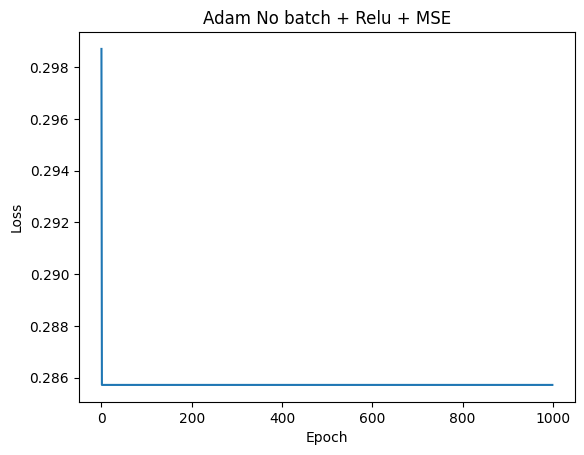

In [304]:
# START 
# Khởi tạo mạng Neural Network 
net = Network() 
net.add(FCLayer((1, 2), (1, 3))) 
net.add(ActivationLayer((1, 3), (1, 3), relu, relu_prime)) 
net.add(FCLayer((1, 3), (1, 1))) 
net.add(ActivationLayer((1, 1), (1, 1), relu, relu_prime)) 
net.setup_loss(mse, mse) 

# Huấn luyện mô hình 
losses_train = []
net.fit(x_train, y_train, losses_train, epochs=1000, learning_rate=0.05) 

print("Độ chính xác trên tập test:")
accuracy = net.accuracy(X_test, y_test)
print(accuracy)

print("Kết quả dự đoán theo đặc trưng [4, 9]:")
out = net.predict([[4, 9]])
print(1) if out[0][0][0] >= 0.5 else print(0)

# Vẽ biểu đồ hàm loss function qua các epoch
plt.plot(losses_train)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(name_optimizer +' '+ have_batch + ' + Relu + MSE')
plt.show()

#### Sigmoid + Log loss 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24904\2285376718.py:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if i % 50 == 0: print('epoch : %d/%d  err = %f'%(i, epochs, err))


epoch : 0/2000  err = 0.693040
epoch : 50/2000  err = 0.576528
epoch : 100/2000  err = 0.494388
epoch : 150/2000  err = 0.454592
epoch : 200/2000  err = 0.444794
epoch : 250/2000  err = 0.508347
epoch : 300/2000  err = 0.495817
epoch : 350/2000  err = 0.476102
epoch : 400/2000  err = 0.438911
epoch : 450/2000  err = 0.441354
epoch : 500/2000  err = 0.490826
epoch : 550/2000  err = 0.465486
epoch : 600/2000  err = 0.521589
epoch : 650/2000  err = 0.419665
epoch : 700/2000  err = 0.444227
epoch : 750/2000  err = 0.458018
epoch : 800/2000  err = 0.554206
epoch : 850/2000  err = 0.438193
epoch : 900/2000  err = 0.441074
epoch : 950/2000  err = 0.449938
epoch : 1000/2000  err = 0.428685
epoch : 1050/2000  err = 0.431023
epoch : 1100/2000  err = 0.489656
epoch : 1150/2000  err = 0.466361
epoch : 1200/2000  err = 0.431394
epoch : 1250/2000  err = 0.433393
epoch : 1300/2000  err = 0.453279
epoch : 1350/2000  err = 0.526342
epoch : 1400/2000  err = 0.491082
epoch : 1450/2000  err = 0.475276
epo

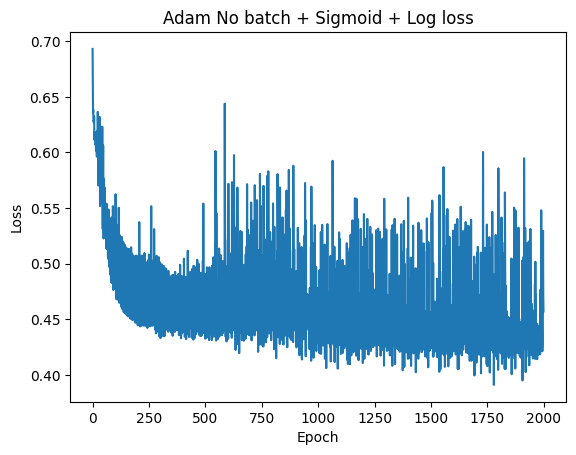

In [305]:
# START 
# Khởi tạo mạng Neural Network 
net = Network() 
net.add(FCLayer((1, 2), (1, 3))) 
net.add(ActivationLayer((1, 3), (1, 3), sigmoid, sigmoid_prime)) 
net.add(FCLayer((1, 3), (1, 1))) 
net.add(ActivationLayer((1, 1), (1, 1), sigmoid, sigmoid_prime)) 
net.setup_loss(log_loss, log_loss_prime) 

# Huấn luyện mô hình 
losses_train = []
net.fit(x_train, y_train, losses_train, epochs=2000, learning_rate=0.06) 

print("Độ chính xác trên tập test:")
accuracy = net.accuracy(X_test, y_test)
print(accuracy)

print("Kết quả dự đoán theo đặc trưng [4, 9]:")
out = net.predict([[4, 9]])
print(1) if out[0][0][0] >= 0.5 else print(0)

# Vẽ biểu đồ hàm loss function qua các epoch
plt.plot(losses_train)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(name_optimizer +' '+ have_batch + ' + Sigmoid + Log loss')
plt.show()

```
<!-- Input Layer -->
<!-- kết nối input và hidden  -->
net.add(FCLayer((1, 2), (1, 3))) 
net.add(ActivationLayer((1, 3), (1, 3), relu, relu_prime)) 
<!-- Hidden Layer -->
<!-- Kết nối hidden và output -->
net.add(FCLayer((1, 3), (1, 1))) 
net.add(ActivationLayer((1, 1), (1, 1), relu, relu_prime)) 
<!-- Output Layer -->
```

```
Input X : 2 node đầu vào 
Hidden : 3 node 
Ouput : 1 node đầu ra 
```

Giải thích 
1. `net.add(FCLayer((1, 2), (1, 3)))`: Trong layer đầu tiên, bạn có 2 đặc trưng đầu vào (x1 và x2), do đó input_shape là (1, 2). Sau đó, bạn muốn có 3 node ở layer tiếp theo, nên output_shape là (1, 3). Điều này đúng vì layer fully connected sẽ có ma trận trọng số kích thước (2, 3) để kết nối từ 2 đặc trưng đầu vào đến 3 node ở layer tiếp theo.

2. `net.add(ActivationLayer((1, 3), (1, 3), relu, relu_prime))`: Đầu ra từ layer trước là 3 node (z1), sau đó qua hàm activation (relu) để tạo ra 3 node mới (a1) là đầu vào cho layer tiếp theo. Do đó, input_shape và output_shape của ActivationLayer đều là (1, 3).

3. `net.add(FCLayer((1, 3), (1, 1)))`: Với layer fully connected tiếp theo, bạn có 3 đầu vào từ layer trước (a1), do đó input_shape là (1, 3). Và vì bạn chỉ muốn có 1 node ở layer đầu ra, nên output_shape là (1, 1).

4. `net.add(ActivationLayer((1, 1), (1, 1), relu, relu_prime))`: Tương tự, output từ layer trước (z2) qua hàm activation để tạo ra giá trị dự đoán (a2). Và vì bạn chỉ có 1 giá trị dự đoán (y), nên input_shape và output_shape của ActivationLayer này đều là (1, 1).

Với cách bạn khai báo, các fully connected layers kết nối đúng giữa các layer và số lượng node đầu ra của layer trước sẽ là số lượng node đầu vào của layer sau, điều này phản ánh đúng cách thức hoạt động của một mạng neural network.